<font face="cursive" size="6.5">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Medical Cost Personal Insurance Project
</span>

</font>



## Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

### Columns                                            
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Importing Necessary Libraries
</span>

</font>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Load Dataset
</span>

</font>


In [2]:
df = pd.read_csv(r'C:\Users\HP\Flip Robo Technology Internship\Practice Project\Medical_Cost_Insurance\medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 1338   Number of columns: 7


In [5]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the results from info, we see that there are no null values in the data and the different data types of the columns

In [6]:
# General statistical description of Numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the results from describe, there seems to be a data that are categorical in nature, but are assigned as integer/float data type.

In [7]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Based on the results from describe, we also see these variables are at the top and more frequent in the dataset: male, non-smoker, southeast region

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<font face="cursive" size="6">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Visualizing The Data
</span>

</font>


<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
 Distribution of charges

</span>

</font>

<AxesSubplot:xlabel='charges', ylabel='Density'>

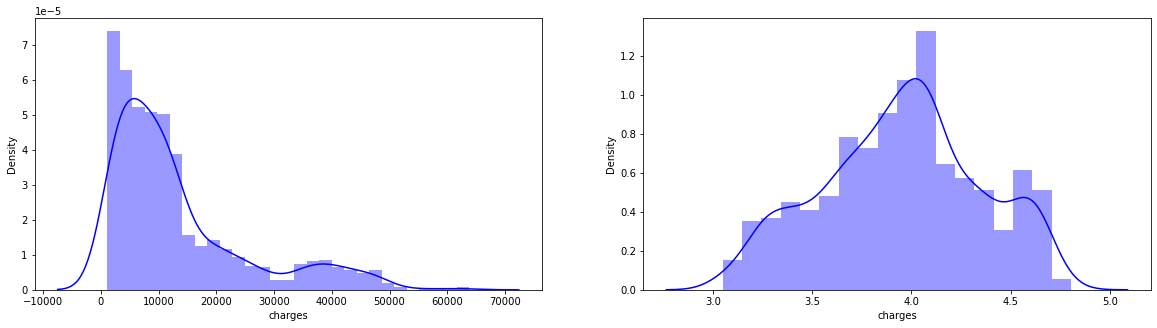

In [11]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'b')

Note: The distribution of the charges is skewed to the right, so we applied natural log for ~ normal distribution.

<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Visualizing distribution of numerical variables vs medical charges
</span>

</font>

Text(0.5, 1.0, 'Distribution of BMI')

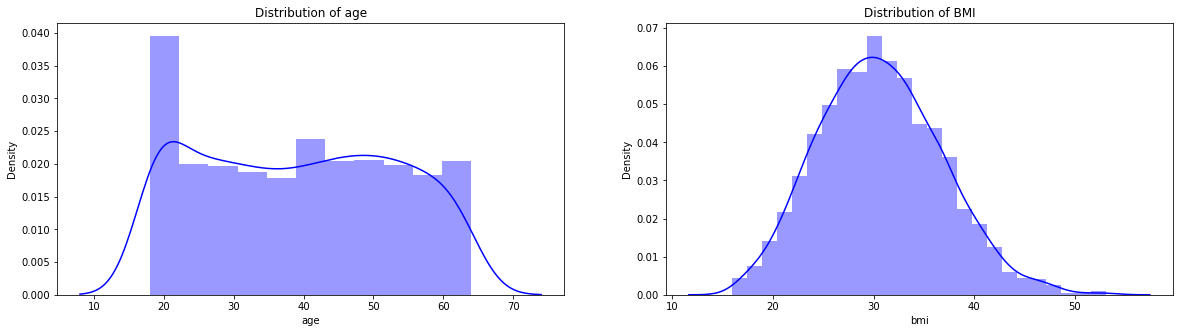

In [12]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

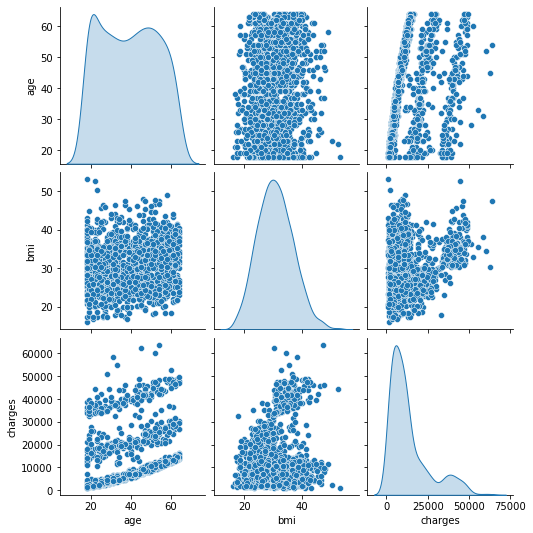

In [13]:
# Pairplot for Age, BMI, Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

The pairplot reveals that there is a linear relationship between age, bmi with charges

<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Visualizing categorical variables individually vs medical charges
</span>

</font>

<AxesSubplot:xlabel='smoker', ylabel='charges'>

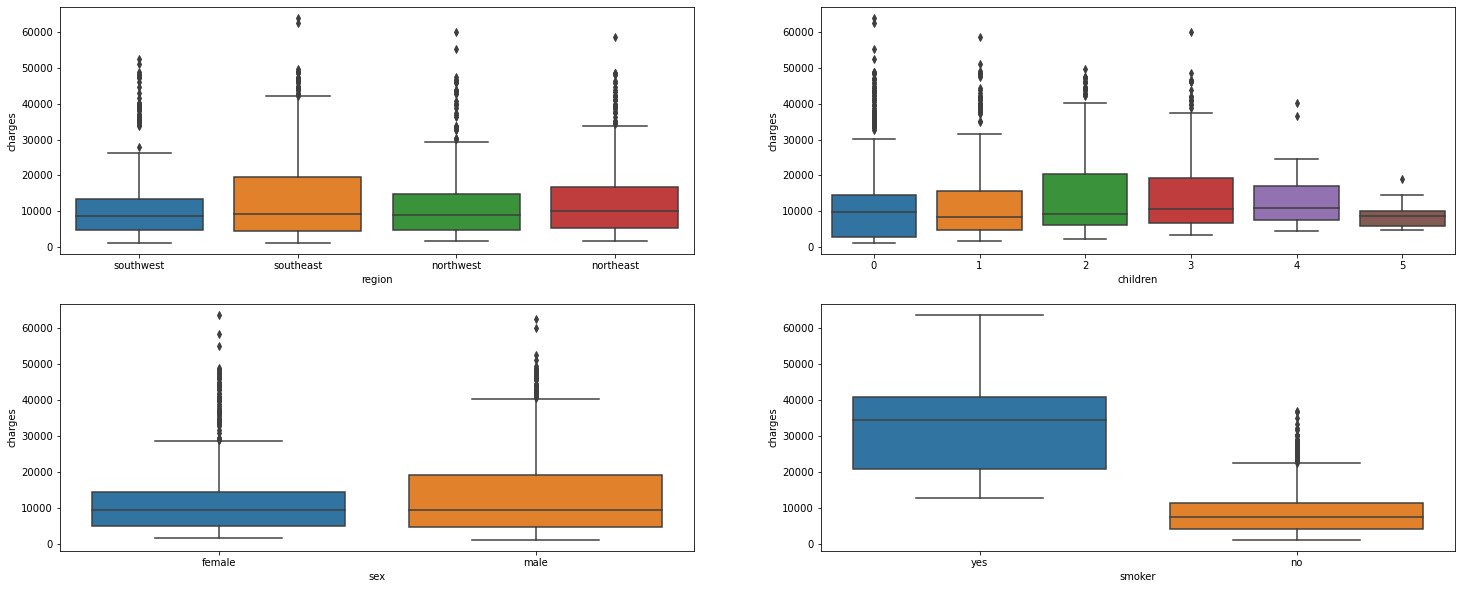

In [14]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

Based on the box plots above, we can derive some inferences on the categorical variables:

- Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.
- Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.
- Gender: The data is a little bit biased towards males as the interquartile range for male is higher compare to that for female. The data representation for male to female is 50.5 to 49.5.
- Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, in comparison to those that do not smoke.

Now that we have looked at the effect of individual variables on medical charges, let's look at effect of a combination of factors on medical charges.


<font face="cursive" size="6">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Bi-Variate Analysis

</font>




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Charges by region

</font>

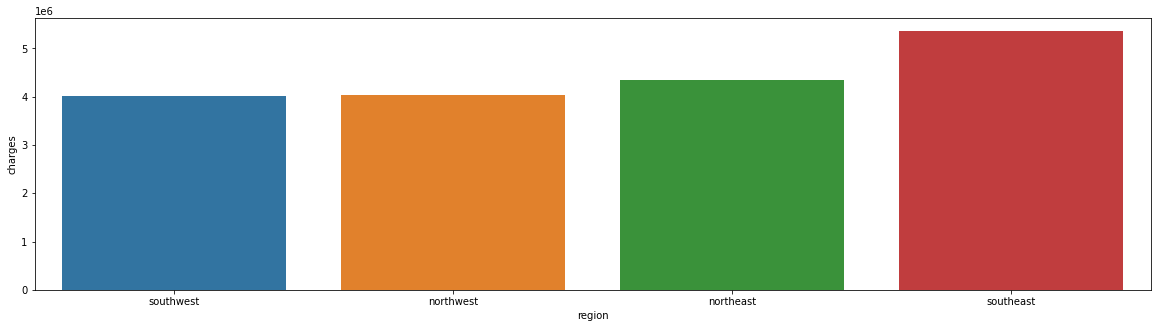

In [15]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Charges by region and number of children

</font>

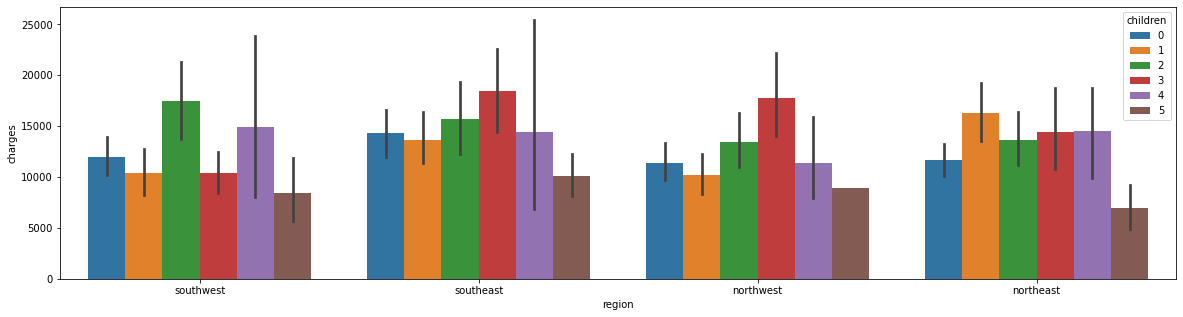

In [16]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.


<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Charges by region and gender
</span>

</font>


<AxesSubplot:xlabel='region', ylabel='charges'>

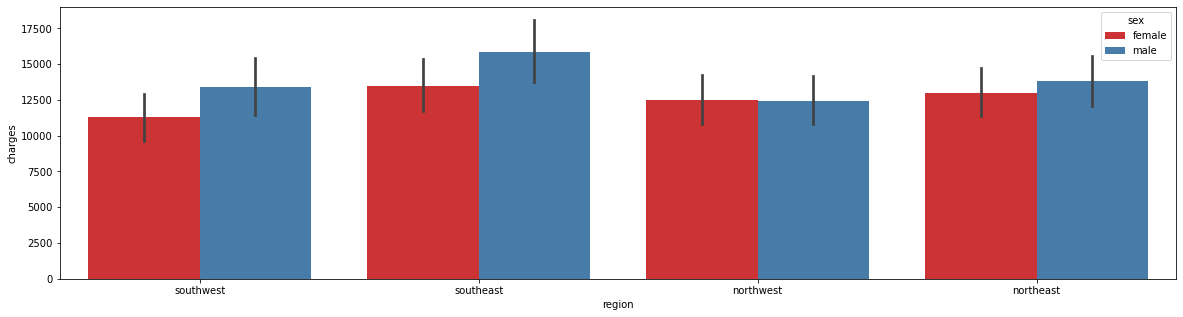

In [17]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges.





<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Charges by region and smoking behavior
</span>

</font>


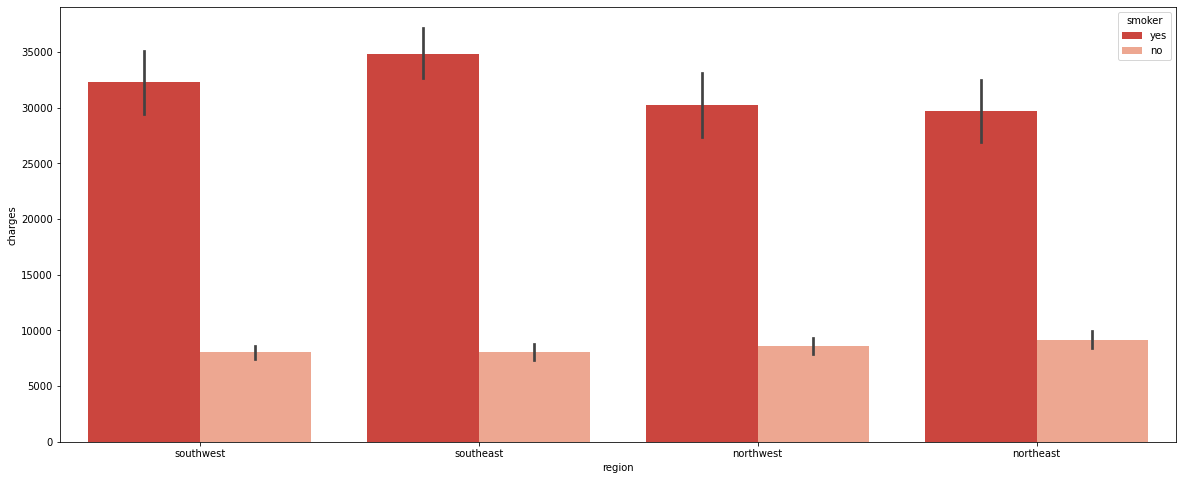

In [18]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, let's see the correlation between non-categorical variables (age, bmi, and children) with medical charges (evaluated based on smoking behavior).




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Charges by age, bmi, and children based on smoking behavior
</span>

</font>


Text(0.5, 1.0, 'Number of children vs Medical Charges')

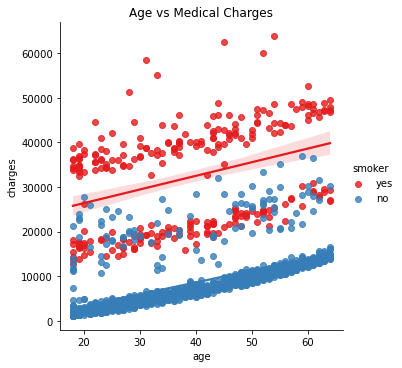

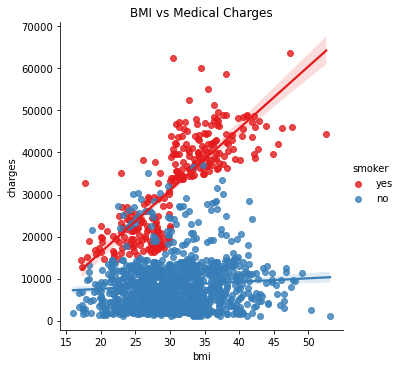

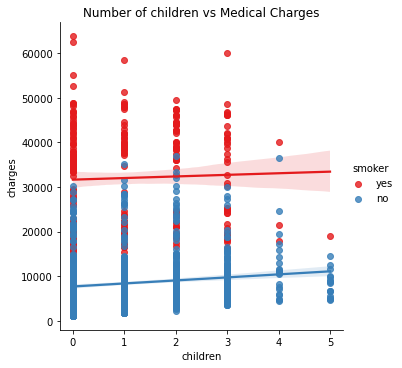

In [19]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Based on the analysis,

We know that smoking has a great impact on medical costs.
Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.





<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
 Data Correlation
</span>

</font>


To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap.

In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.



In [20]:
# Converting data to categorical type data
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [21]:
# Converting Data to numerical type using LabelEncoder

label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


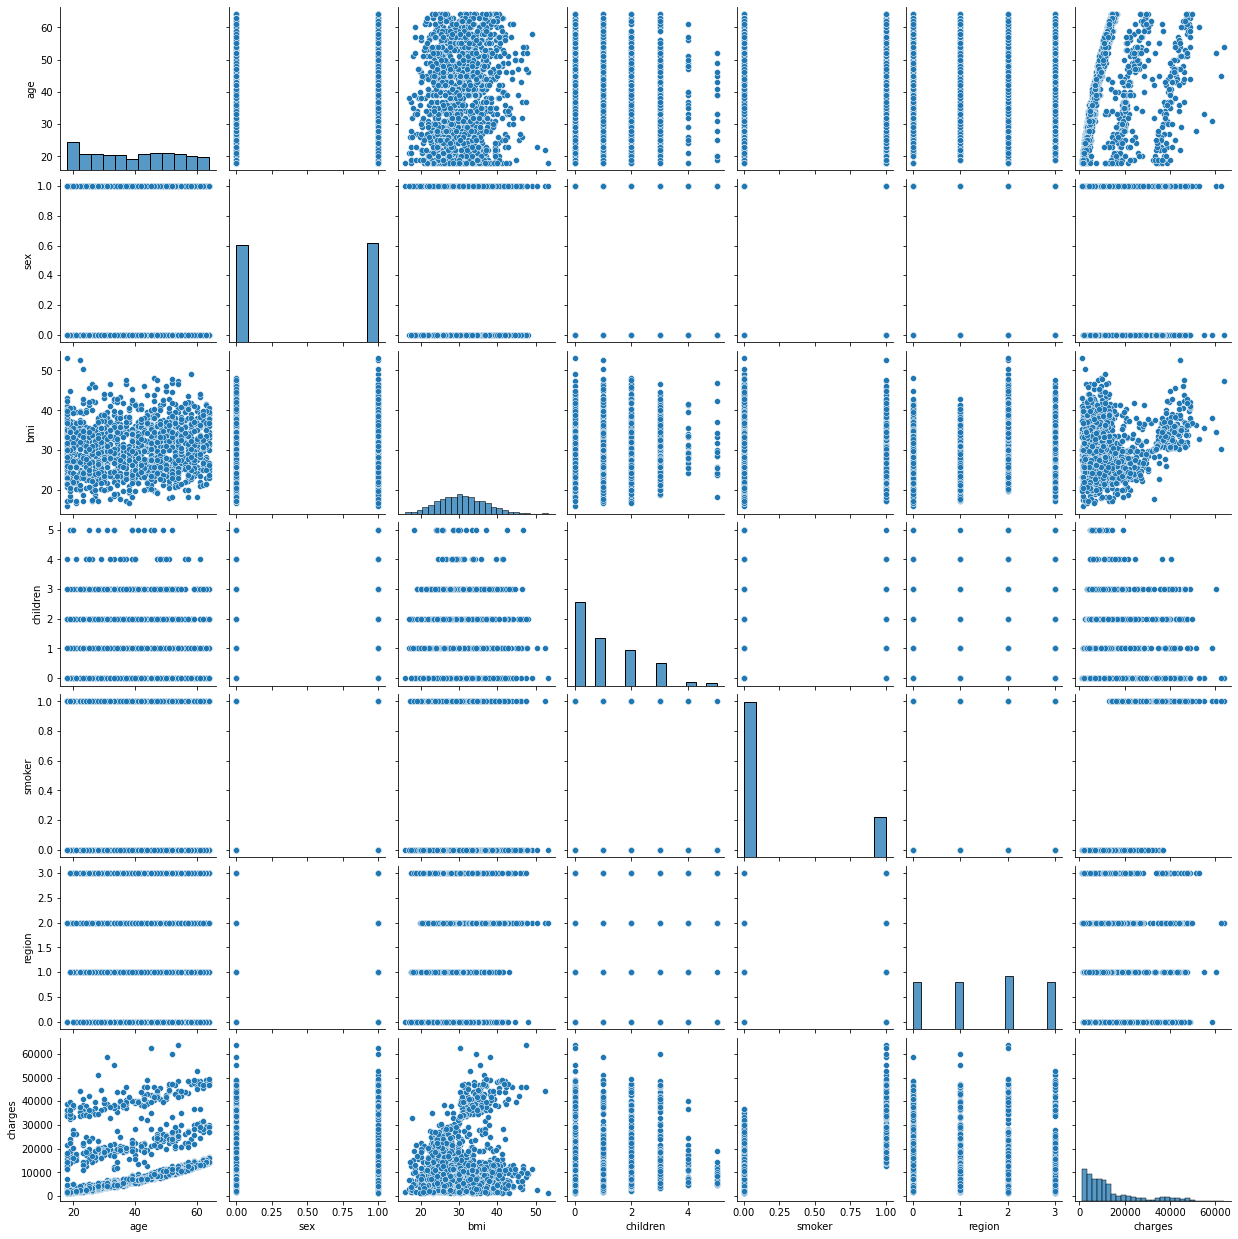

In [23]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

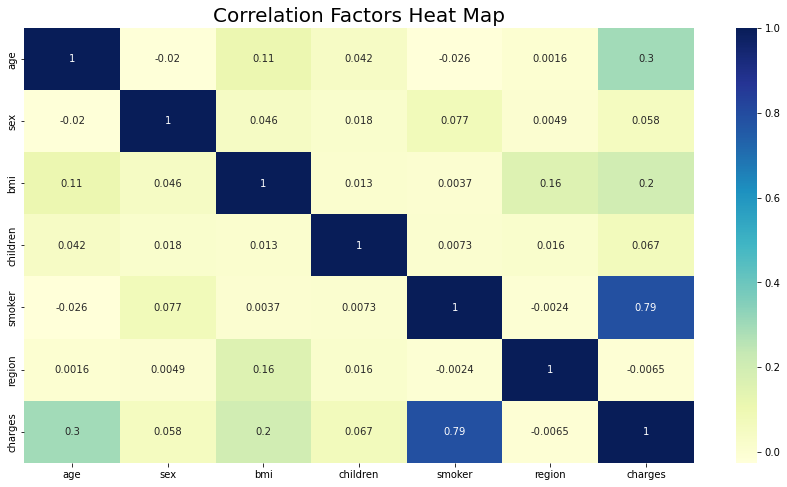

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

- The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).
- This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.



<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Preparing Data for Machine Learning
</span>

</font>

In [25]:
X = df.drop('charges', axis = 1)
y = df['charges']



<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Train Test Split
</span>

</font>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)



<font face="cursive" size="5">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Model Building
</span>

</font>



<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Linear Regression
</span>

</font>

In [27]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7526726290709554
MAE 4400.502490291575




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Best Fit Line
</span>

</font>

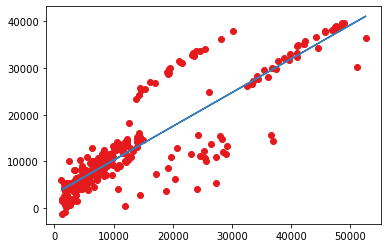

In [28]:
palette = "Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()



<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Ridge Regression
</span>

</font>

In [29]:
R = Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.750129548718422
MAE 4508.836007618555




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Lasso Regression
</span>

</font>

In [30]:
L = Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7526726303757756
MAE 4400.502800096361




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Decision Tree Regression
</span>

</font>

In [31]:
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.830552712192923
MAE 3222.1058103515065




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Random Forest Regression
</span>

</font>

In [32]:

RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=15)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8441502558295858
MAE 2852.234054562688




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Extra Tree Regression
</span>

</font>

In [33]:

ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15,
                           bootstrap=True)

ET.fit(X_train,y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8448254320064397
MAE 3028.0972342050354




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
ADA Boost Regressor
</span>

</font>

In [34]:
AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.822833019860121
MAE 4101.575483420058




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Gradient Boosting Regressor
</span>

</font>

In [35]:
GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8482981041763031
MAE 2768.3627491116113




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
XGB Regressor
</span>

</font>

In [36]:
XG = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.1)
XG.fit(X_train,y_train)
y_pred = XG.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8500273255494102
MAE 2769.5580283606864




<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
DataFrame of all the model and MAE
</span>

</font>

In [37]:

# Define the models
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
    'XGBoost': XG
}

# Create an empty dataframe
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the results to the dataframe
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)

In [38]:
results_df

,Model,R2 Score,MAE
0,Linear Regression,0.752673,4400.50249
1,Ridge,0.75013,4508.836008
2,Lasso,0.752673,4400.5028
3,Decision Tree,0.830553,3222.10581
4,Random Forest,0.84415,2852.234055
5,Extra Trees,0.844825,3028.097234
6,AdaBoost,0.820088,4323.994835
7,Gradient Boosting,0.848202,2773.117873
8,XGBoost,0.850027,2769.558028


based on both the R2 score and MAE, the XGBoost model is considered the best model among the ones listed.



<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Feature Importance
</span>

</font>

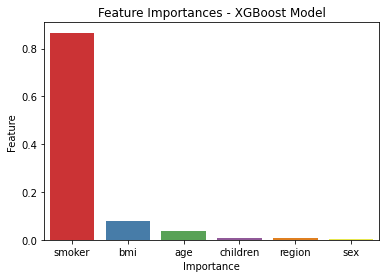

In [39]:
# Train the XGBoost model (I have already trained and named it 'XG')
XG.fit(X_train, y_train)

# Get feature importances
importances = XG.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to hold feature importance data
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual. 



<font face="cursive" size="3">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Saving Model
</span>

</font>

 

In [40]:
filename = 'XGBRegressor.pkl'
pickle.dump(XG, open(filename, 'wb'))

<font face="cursive" size="8">
<span style="background-color:rgb(255, 255, 0); padding: 10px; text-align: center; display: block;">
PROJECT COMPLETED
</span>
</font>